<a href="https://colab.research.google.com/github/pravallika2580/Brainwave_Matrix_Intern/blob/main/Task1_Fake_news_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")

print("Path to dataset files:", path)

100%|██████████| 41.0M/41.0M [00:01<00:00, 38.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1


In [ ]:
import os

# Check the downloaded files
os.listdir(path)

['News _dataset']

In [ ]:
# List the files in the directory
dataset_dir = os.path.join(path, 'News _dataset')
print(os.listdir(dataset_dir))


['True.csv', 'Fake.csv']


# **(1) Importing The libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier




---



# **(2) Data loading**

In [ ]:
true_path = os.path.join(dataset_dir, 'True.csv')
fake_path = os.path.join(dataset_dir, 'Fake.csv')
data_true = pd.read_csv(true_path)
data_fake = pd.read_csv(fake_path)

In [ ]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# Add class labels
data_fake['class'] = 0
data_true['class'] = 1

In [ ]:
# Remove last 10 entries for manual testing
data_fake = data_fake.iloc[:-10]
data_true = data_true.iloc[:-10]

In [ ]:
# Merge datasets
data_merge = pd.concat([data_fake, data_true], axis=0)
data_merge = data_merge.sample(frac=1).reset_index(drop=True) # Shuffle data to avoid bias



---



# **(3) Data Preprocessing**

In [ ]:
def word_opt(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

data_merge['text'] = data_merge['text'].apply(word_opt)  # Apply cleaning function




---



# **(4) Splitting the Dataset**

In [ ]:
X = data_merge['text']  # Independent variable (features)
y = data_merge['class']  # Dependent variable (labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


> *   The dataset has been successfully split into training and testing sets, with 80% of the data allocated for training and 20% for testing.
*   The training set will be used to train the machine learning model to learn patterns and relationships in the data.
The testing set will be used to evaluate the model's performance on unseen data, ensuring its ability to generalize
*   A fixed random_state value (42) ensures that the split is consistent and reproducible across different runs.




In [ ]:
vectorizer = TfidfVectorizer()  # Convert text to numerical format
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)



---



# **(5) Model Training**

**1.Logistic Regression**

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5849
           1       0.99      0.99      0.99      5371

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



**2.Decision Tree Classifier**

In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, pred_dt))

Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5849
           1       1.00      1.00      1.00      5371

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



**3.Gradient Boosting Classifier**

In [ ]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)
print("Gradient Boosting:\n", classification_report(y_test, pred_gb))

Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5849
           1       0.99      1.00      1.00      5371

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



**4.Random Forest Classifier**

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5849
           1       0.99      0.98      0.98      5371

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# **(6) Evaluation Metrics**

**1.Precision,Recall and F1-score**

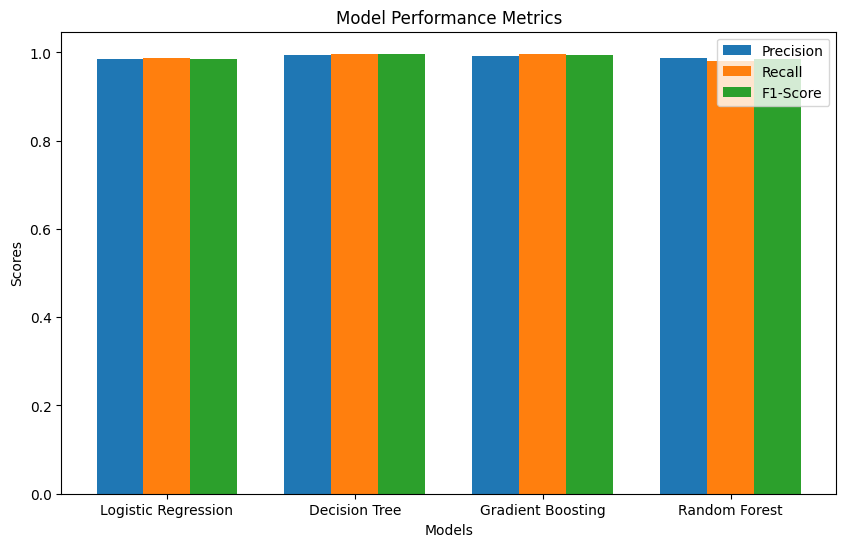

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute metrics for each model
metrics = {
    "Logistic Regression": [precision_score(y_test, pred_lr), recall_score(y_test, pred_lr), f1_score(y_test, pred_lr)],
    "Decision Tree": [precision_score(y_test, pred_dt), recall_score(y_test, pred_dt), f1_score(y_test, pred_dt)],
    "Gradient Boosting": [precision_score(y_test, pred_gb), recall_score(y_test, pred_gb), f1_score(y_test, pred_gb)],
    "Random Forest": [precision_score(y_test, pred_rf), recall_score(y_test, pred_rf), f1_score(y_test, pred_rf)]
}

# Data for plotting
models = list(metrics.keys())
precision = [m[0] for m in metrics.values()]
recall = [m[1] for m in metrics.values()]
f1 = [m[2] for m in metrics.values()]

# Plot
x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=0.25, label='Precision', align='center')
plt.bar([p + 0.25 for p in x], recall, width=0.25, label='Recall', align='center')
plt.bar([p + 0.5 for p in x], f1, width=0.25, label='F1-Score', align='center')
plt.xticks([p + 0.25 for p in x], models)
plt.title("Model Performance Metrics")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend()
plt.show()


# **(7) Comparing Model Accuracy**

<ipython-input-41-9ec53ca261ae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


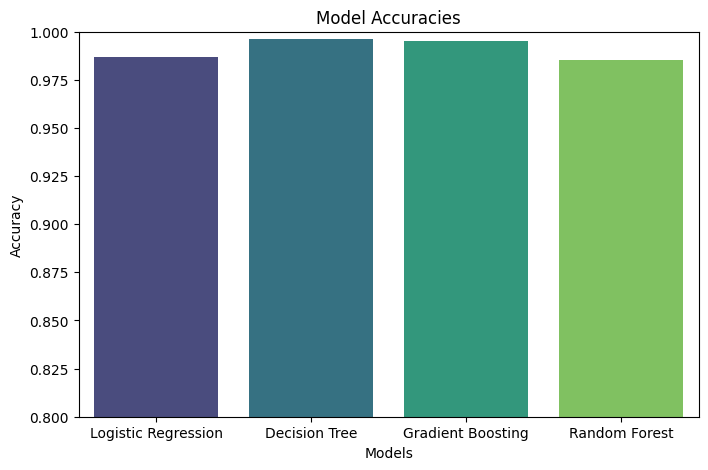

In [ ]:
# Model accuracies
accuracies = {
    "Logistic Regression": lr.score(X_test, y_test),
    "Decision Tree": dt.score(X_test, y_test),
    "Gradient Boosting": gb.score(X_test, y_test),
    "Random Forest": rf.score(X_test, y_test)
}

# Plot accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.title("Model Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()




> * From the bar chart titled "Model Accuracies", we can observe the following:
High Accuracy Across All Models:
*   All the models, including Logistic Regression,Decision Tree, Gradient Boosting, and Random Forest, show very high accuracy scores, close to 1.0 (or 100%).
*   **Best Performing Models:**


>*  Among the four models, Decision Tree and Gradient Boosting appear to achieve the highest accuracy, both reaching near-perfect scores.
*  Slight Variation:Random Forest shows slightly lower accuracy compared to the other models but is still above 0.95, indicating excellent performance.







**Confusion Matrix**

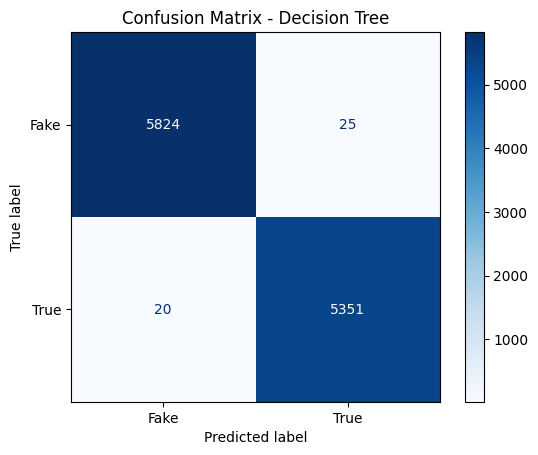

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Logistic Regression
cm_dt = confusion_matrix(y_test, pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["Fake", "True"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


# **(6) Manual Testing**

In [ ]:
def output_label(n):
    return "Fake News" if n == 0 else "Not Fake News"

def manual_testing(news):
    testing_news = {"text": [news]}
    testing_news = pd.DataFrame(testing_news)
    testing_news['text'] = testing_news['text'].apply(word_opt)
    testing_vector = vectorizer.transform(testing_news['text'])

    pred_lr = lr.predict(testing_vector)
    pred_dt = dt.predict(testing_vector)
    pred_gb = gb.predict(testing_vector)
    pred_rf = rf.predict(testing_vector)

    return f"""LR Prediction: {output_label(pred_lr[0])}
DT Prediction: {output_label(pred_dt[0])}
GBC Prediction: {output_label(pred_gb[0])}
RFC Prediction: {output_label(pred_rf[0])}"""

news_input = input("Enter news text: ")
print(manual_testing(news_input))


Enter news text: Scientists Confirm COVID-19 Vaccines Contain Tracking Microchips. Article: "In a shocking revelation, scientists confirmed that the COVID-19 vaccine contains microchips designed to track individuals worldwide. This finding has raised concerns about personal privacy.
LR Prediction: Fake News
DT Prediction: Fake News
GBC Prediction: Fake News
RFC Prediction: Fake News
